### Setup & Libraries

In [6]:
setwd('E:/OneDrive - OS2/OneDrive/Documents/BDMA/Classes/UniPD/Business & Financial Data/Project/modelling')

In [7]:
library(dplyr)
library(readr)
library(lmtest)
library(forecast)
library(DIMORA)
library(fpp2)

### Read the Data

In [8]:
# Read the CSV's
hourly_amount_per_year = read_csv(file='data/hourly_amount_per_year.csv')
hourly_trips_per_year = read_csv(file='data/hourly_trips_per_year.csv')

# Extract y
amount <- hourly_amount_per_year$total_amount
trips <- hourly_trips_per_year$trips

# Create timeseries objects (2 for amount and trips, and other 2 applying a log transform on these)
ts_hourly_amount_per_year = ts(amount, frequency=24, start=c(2011, 1))
ts_hourly_log_amount_per_year = ts(log(amount), frequency=24, start=c(2011, 1))

ts_hourly_trips_per_year = ts(trips, frequency=24, start=c(2011, 1))
ts_hourly_log_trips_per_year = ts(log(trips), frequency=24, start=c(2011, 1))

Rows: 288 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): pickup_hour_year
dbl (1): total_amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 288 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): pickup_hour_year
dbl (1): trips

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Plot the Data

**Observations**
- For amount, there is some sort of disruption around 2013 and 2020; this might be caused by the introduction of Uber (2011) and Covid (2020)

    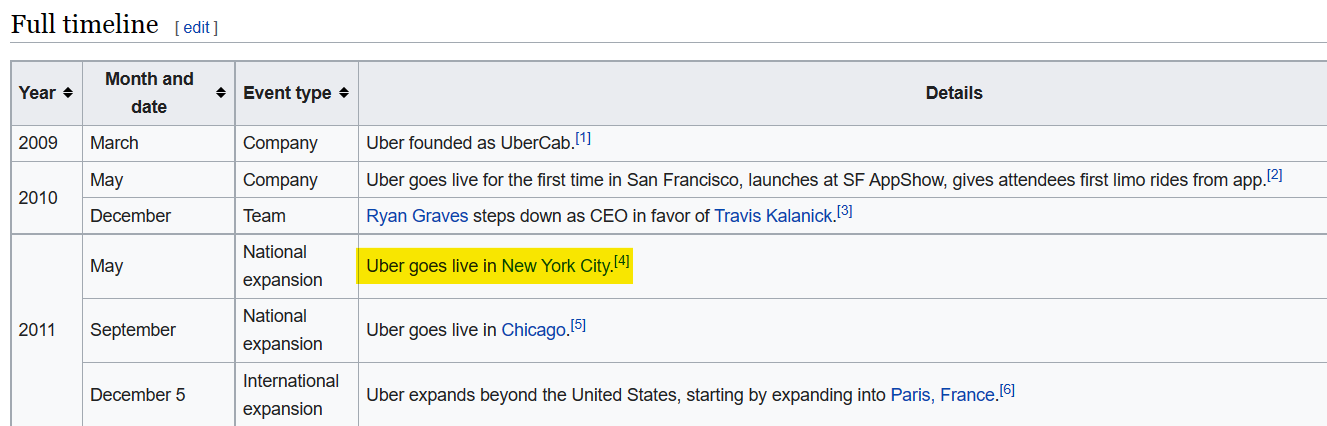

    Source: https://en.wikipedia.org/wiki/Timeline_of_Uber
- Same happens for trips but around years for 2012 and 2020
- The variance of both series seems to change each year, for amount it increases while for trips it decreases

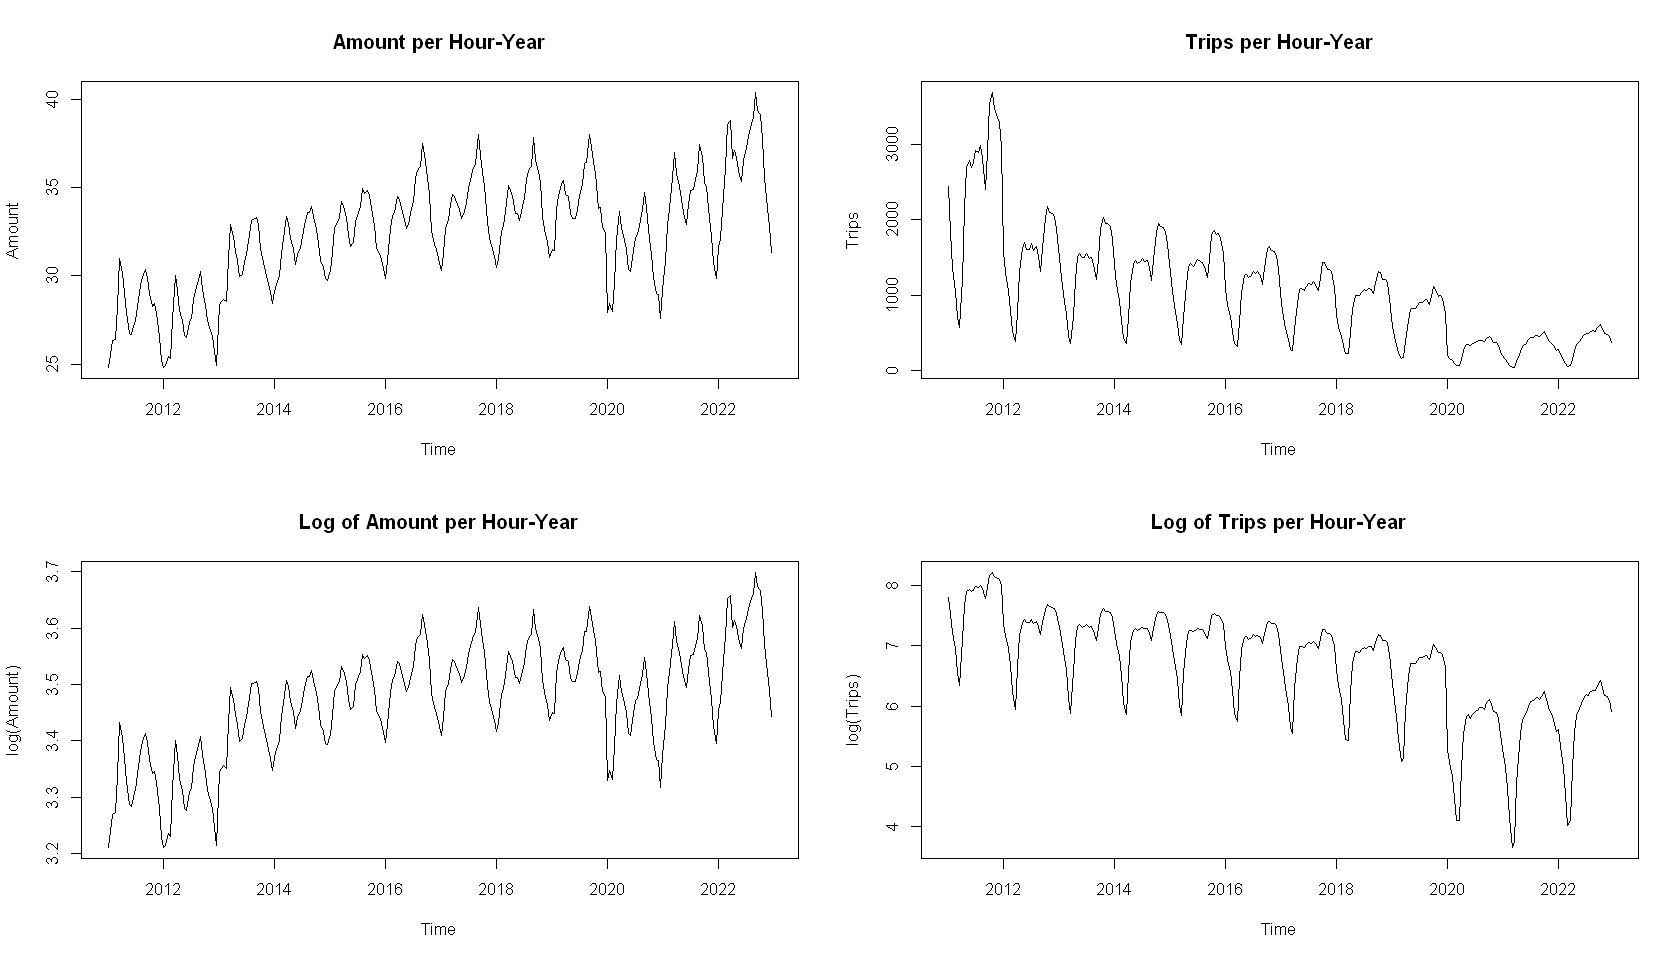

In [9]:
options(repr.plot.width=14, repr.plot.height=8)
par(mfrow = c(2, 2))
plot(ts_hourly_amount_per_year, ylab='Amount', main='Amount per Hour-Year')
plot(ts_hourly_trips_per_year, ylab='Trips', main='Trips per Hour-Year')
plot(ts_hourly_log_amount_per_year, ylab='log(Amount)', main='Log of Amount per Hour-Year')
plot(ts_hourly_log_trips_per_year, ylab='log(Trips)', main='Log of Trips per Hour-Year')

#### Check the **Autocorrelation Function**

Observations:
- Both series are positively autocorrelated and exhibit a sinusoidal pattern

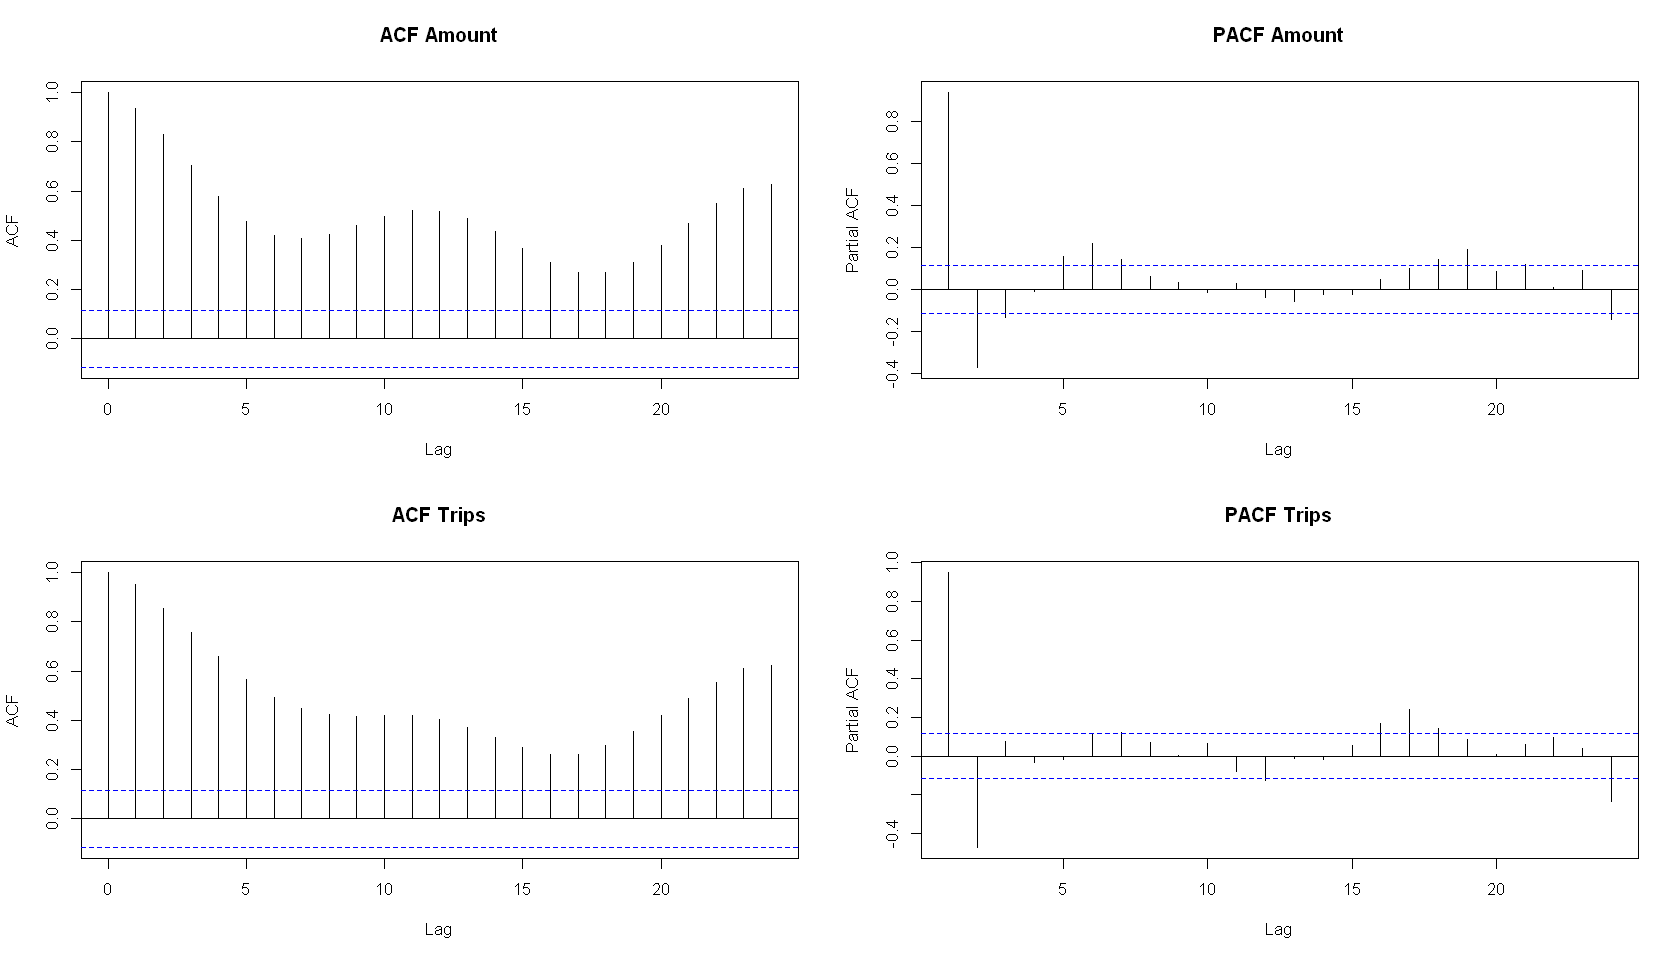

In [10]:
options(repr.plot.width=14, repr.plot.height=8)
par(mfrow = c(2, 2))
plot(acf(amount, plot=FALSE), main='ACF Amount')
plot(Pacf(amount, plot=FALSE), main='PACF Amount')
plot(acf(trips, plot=FALSE), main='ACF Trips')
plot(Pacf(trips, plot=FALSE), main='PACF Trips')

### Linear Model Analysis

#### Linear Model with Trend

In [11]:
# Linear Model fit for Amount
lm_fit_amount <- tslm(ts_hourly_amount_per_year~trend)
lm_fit_amount_residuals <- residuals(lm_fit_amount)
summary(lm_fit_amount)
dwtest(lm_fit_amount)


Call:
tslm(formula = ts_hourly_amount_per_year ~ trend)

Residuals:
   Min     1Q Median     3Q    Max 
-7.162 -1.503  0.175  1.752  5.343 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.735658   0.280452   102.5   <2e-16 ***
trend        0.025072   0.001682    14.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.374 on 286 degrees of freedom
Multiple R-squared:  0.4371,	Adjusted R-squared:  0.4352 
F-statistic: 222.1 on 1 and 286 DF,  p-value: < 2.2e-16



	Durbin-Watson test

data:  lm_fit_amount
DW = 0.18922, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [12]:
# Linear Model fit for Trips
lm_fit_trips <- tslm(ts_hourly_trips_per_year~trend)
lm_fit_trips_residuals <- residuals(lm_fit_trips)
summary(lm_fit_trips)
dwtest(lm_fit_trips)


Call:
tslm(formula = ts_hourly_trips_per_year ~ trend)

Residuals:
     Min       1Q   Median       3Q      Max 
-1405.57  -257.80    28.62   274.35  1837.17 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1980.6953    59.0598   33.54   <2e-16 ***
trend         -6.3649     0.3543  -17.97   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 499.8 on 286 degrees of freedom
Multiple R-squared:  0.5302,	Adjusted R-squared:  0.5286 
F-statistic: 322.8 on 1 and 286 DF,  p-value: < 2.2e-16



	Durbin-Watson test

data:  lm_fit_trips
DW = 0.17961, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


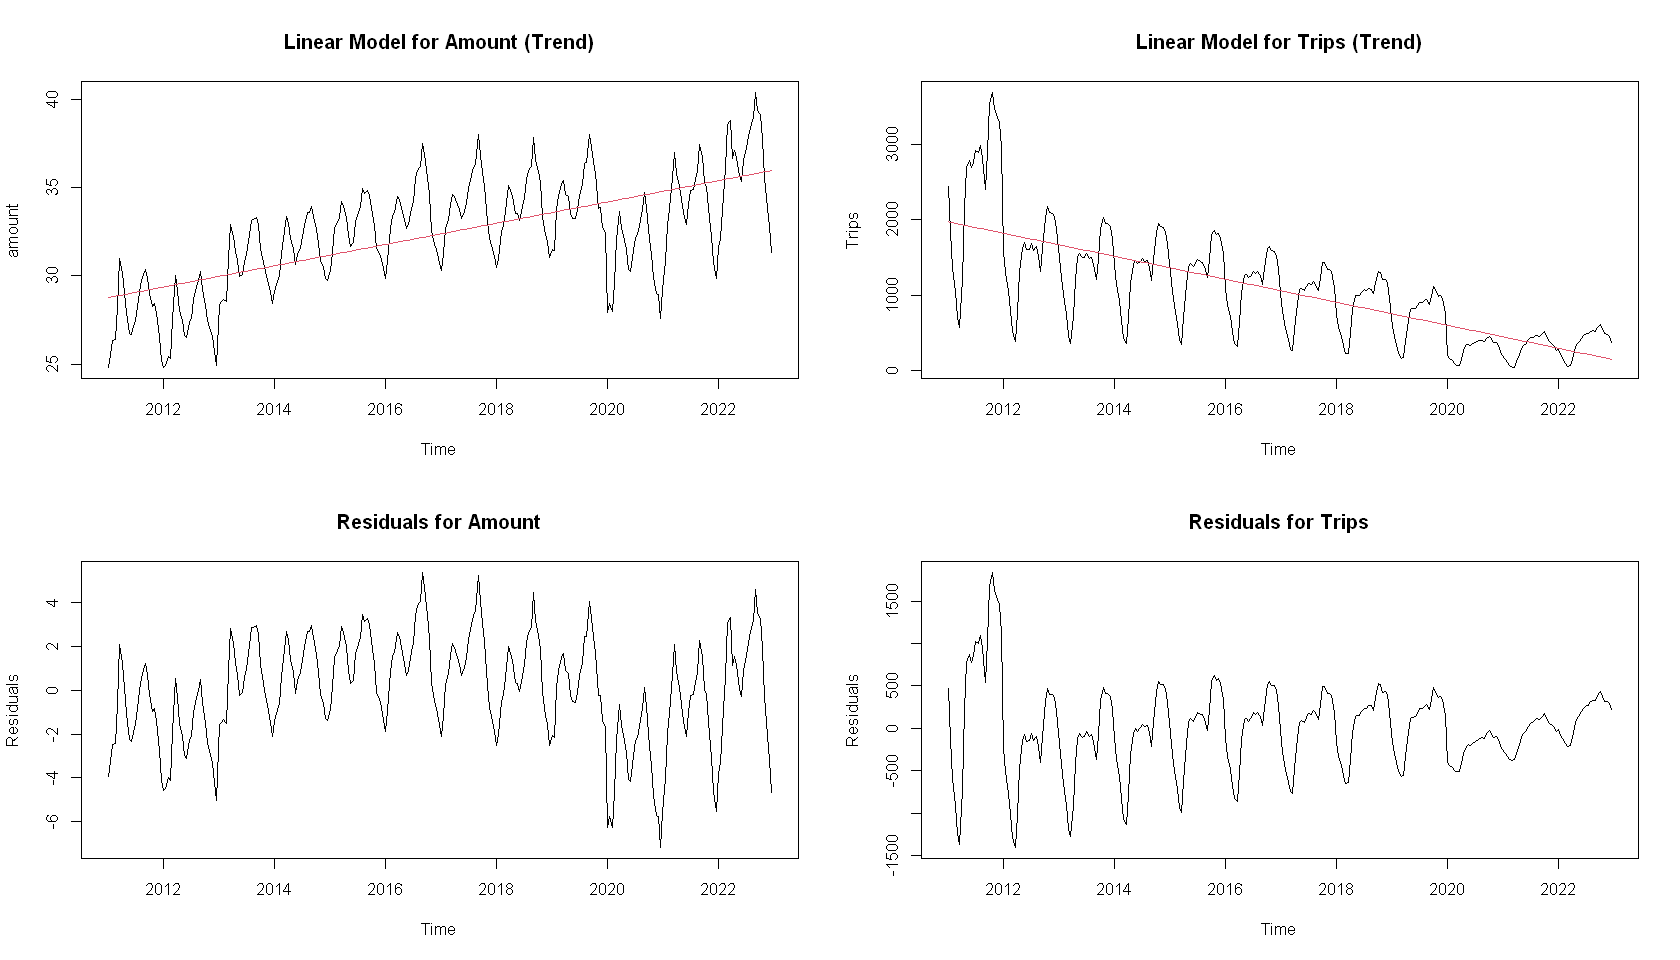

In [13]:
options(repr.plot.width=14, repr.plot.height=8)
par(mfrow = c(2, 2))
plot(ts_hourly_amount_per_year, ylab='amount', main='Linear Model for Amount (Trend)')
lines(fitted(lm_fit_amount), col=2)
plot(ts_hourly_trips_per_year, ylab='Trips', main='Linear Model for Trips (Trend)')
lines(fitted(lm_fit_trips), col=2)
plot(lm_fit_amount_residuals, ylab='Residuals', main='Residuals for Amount')
plot(lm_fit_trips_residuals, ylab='Residuals', main='Residuals for Trips')

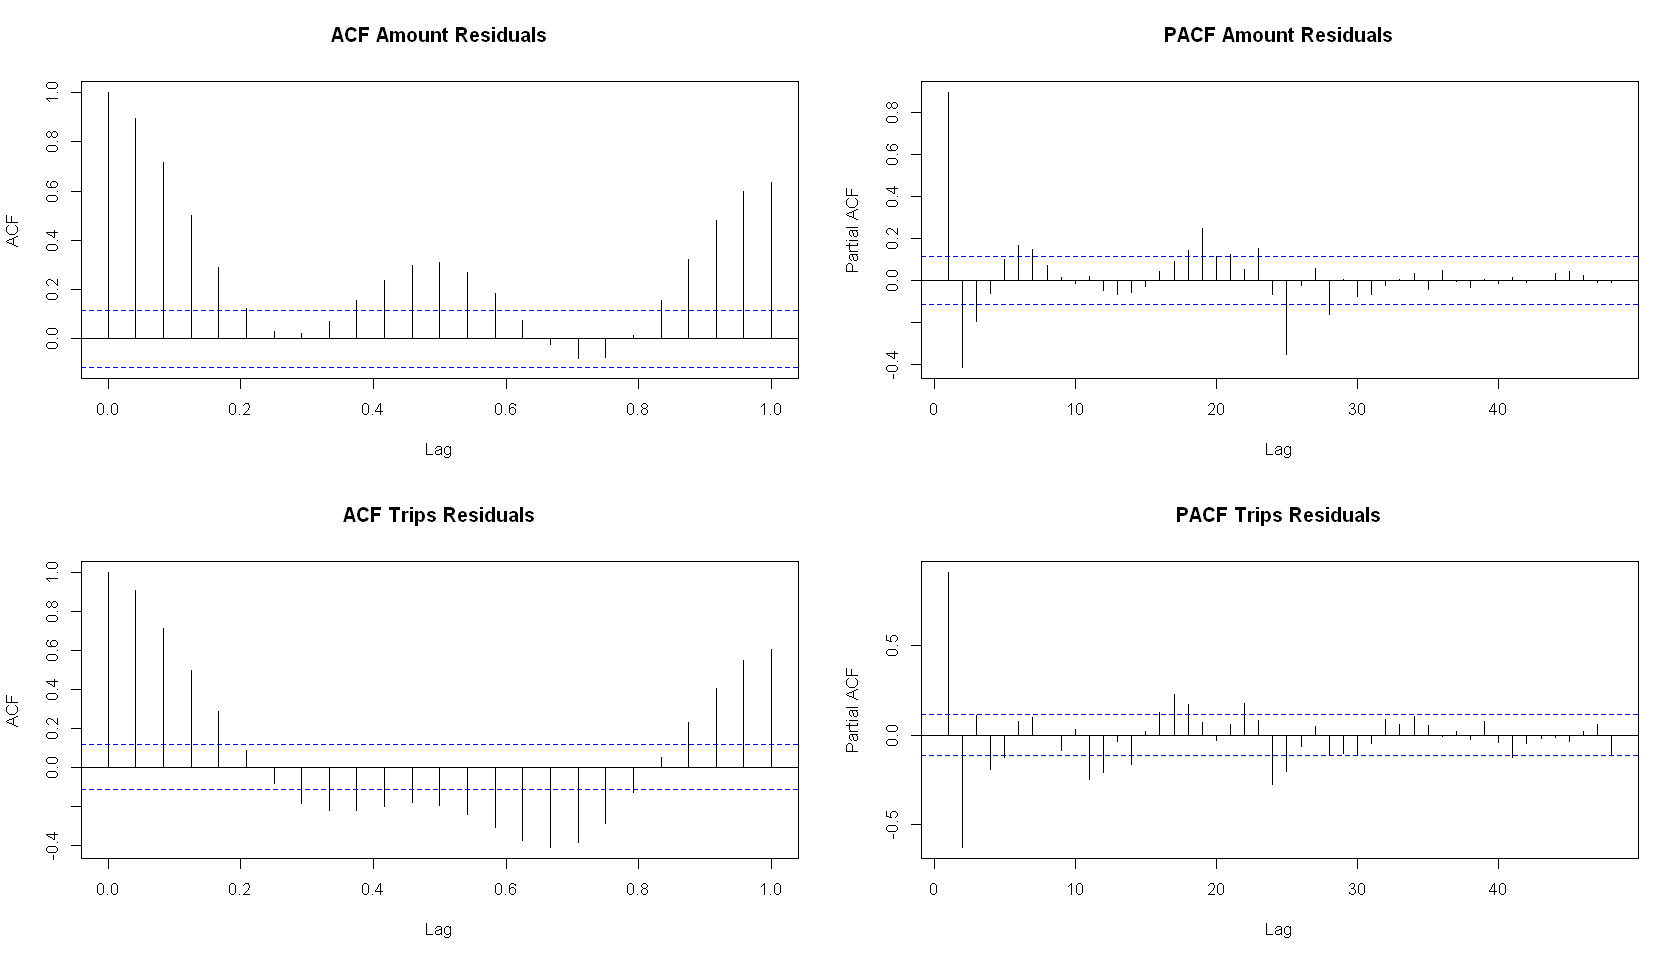

In [14]:
options(repr.plot.width=14, repr.plot.height=8)
par(mfrow = c(2, 2))
plot(acf(lm_fit_amount_residuals, plot=FALSE), main='ACF Amount Residuals')
plot(Pacf(lm_fit_amount_residuals, plot=FALSE), main='PACF Amount Residuals')
plot(acf(lm_fit_trips_residuals, plot=FALSE), main='ACF Trips Residuals')
plot(Pacf(lm_fit_trips_residuals, plot=FALSE), main='PACF Trips Residuals')

#### Linear Model with Trend + Seasonality

In [15]:
# Linear Model fit for Amount
lm_fit_amount <- tslm(ts_hourly_amount_per_year~trend+season)
lm_fit_amount_residuals <- residuals(lm_fit_amount)
summary(lm_fit_amount)
dwtest(lm_fit_amount)


Call:
tslm(formula = ts_hourly_amount_per_year ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9683 -1.2292  0.6426  1.1772  2.7431 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.704198   0.514439  49.965  < 2e-16 ***
trend        0.024953   0.001204  20.717  < 2e-16 ***
season2      0.590286   0.691356   0.854 0.393987    
season3      1.767936   0.691359   2.557 0.011114 *  
season4      2.399540   0.691364   3.471 0.000606 ***
season5      3.772678   0.691372   5.457 1.12e-07 ***
season6      5.059630   0.691381   7.318 3.05e-12 ***
season7      4.311183   0.691393   6.236 1.79e-09 ***
season8      3.735893   0.691406   5.403 1.47e-07 ***
season9      2.988652   0.691422   4.322 2.19e-05 ***
season10     2.246903   0.691440   3.250 0.001306 ** 
season11     2.213568   0.691460   3.201 0.001536 ** 
season12     2.941695   0.691482   4.254 2.92e-05 ***
season13     3.533217   0.691506   5.109 6.22e-07 ***
season14     4.


	Durbin-Watson test

data:  lm_fit_amount
DW = 0.14199, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


In [16]:
# Linear Model fit for Trips
lm_fit_trips <- tslm(ts_hourly_trips_per_year~trend+season)
lm_fit_trips_residuals <- residuals(lm_fit_trips)
summary(lm_fit_trips)
dwtest(lm_fit_trips)


Call:
tslm(formula = ts_hourly_trips_per_year ~ trend + season)

Residuals:
    Min      1Q  Median      3Q     Max 
-600.78 -158.51  -10.73   83.79 1258.27 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1907.7001    93.8955  20.317  < 2e-16 ***
trend         -6.6981     0.2198 -30.468  < 2e-16 ***
season2     -205.9194   126.1864  -1.632  0.10390    
season3     -366.5558   126.1869  -2.905  0.00399 ** 
season4     -530.0159   126.1879  -4.200 3.65e-05 ***
season5     -682.1611   126.1892  -5.406 1.45e-07 ***
season6     -721.7983   126.1910  -5.720 2.89e-08 ***
season7     -430.3916   126.1931  -3.411  0.00075 ***
season8      -46.4516   126.1955  -0.368  0.71310    
season9      181.8615   126.1984   1.441  0.15075    
season10     223.6167   126.2017   1.772  0.07757 .  
season11     200.3369   126.2053   1.587  0.11363    
season12     243.1951   126.2093   1.927  0.05507 .  
season13     301.5105   126.2137   2.389  0.01760 *  
season14     283


	Durbin-Watson test

data:  lm_fit_trips
DW = 0.16095, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


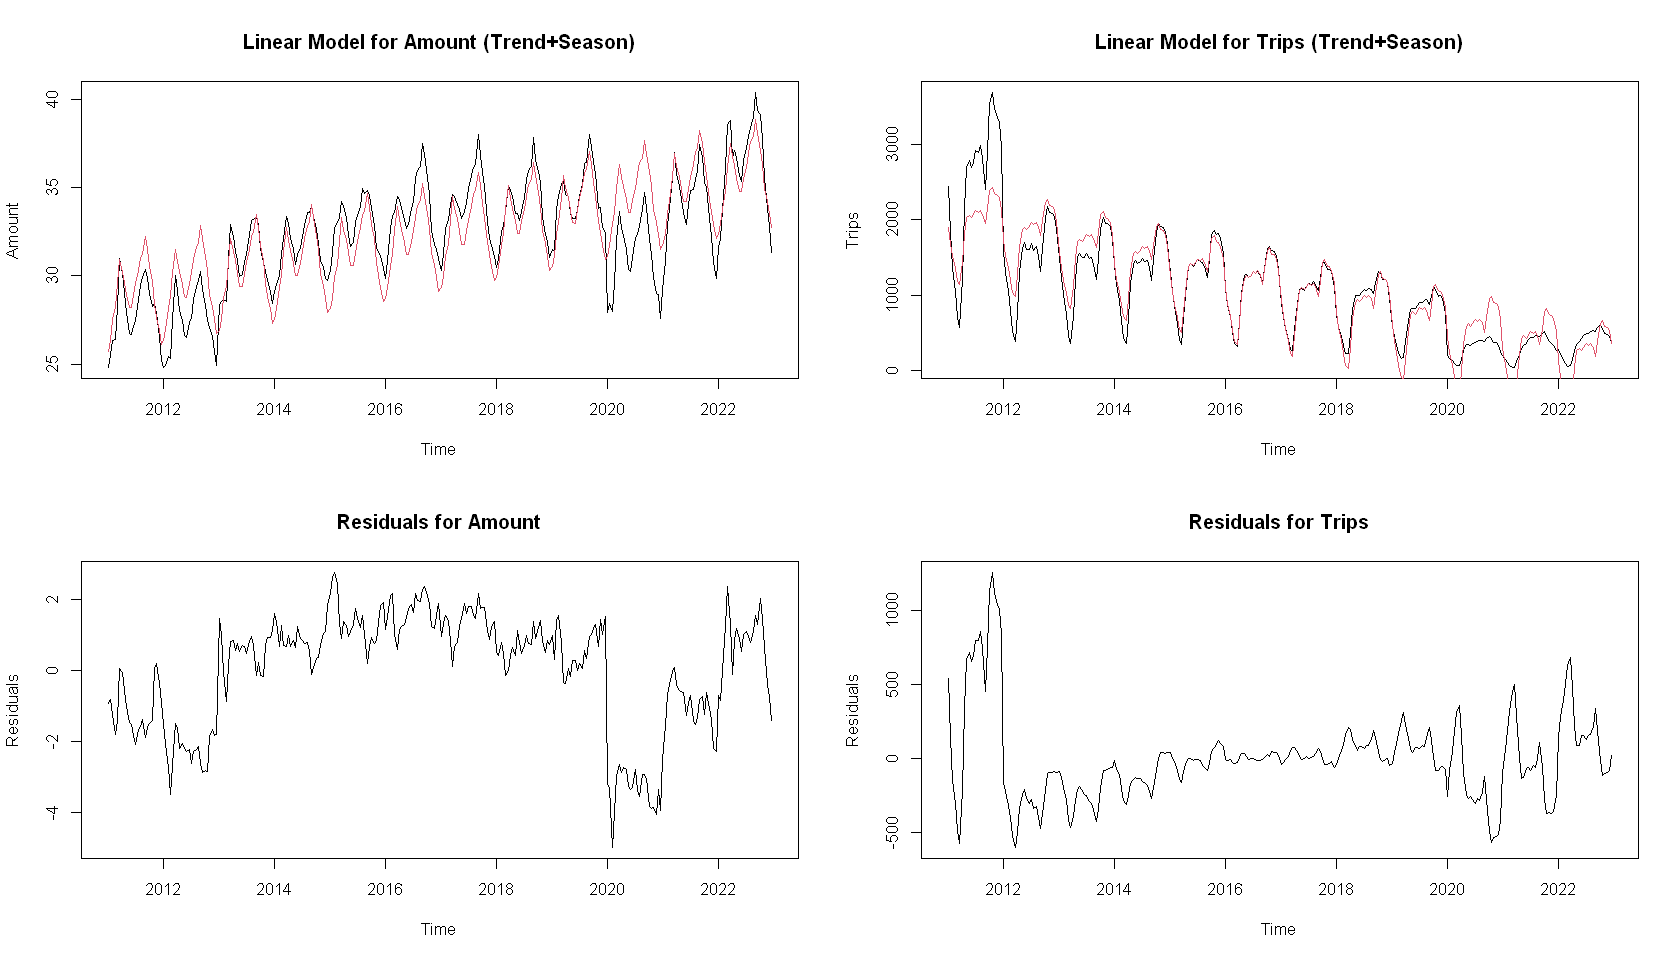

In [17]:
options(repr.plot.width=14, repr.plot.height=8)
par(mfrow = c(2, 2))
plot(ts_hourly_amount_per_year, ylab='Amount', main='Linear Model for Amount (Trend+Season)')
lines(fitted(lm_fit_amount), col=2)
plot(ts_hourly_trips_per_year, ylab='Trips', main='Linear Model for Trips (Trend+Season)')
lines(fitted(lm_fit_trips), col=2)
plot(lm_fit_amount_residuals, ylab='Residuals', main='Residuals for Amount')
plot(lm_fit_trips_residuals, ylab='Residuals', main='Residuals for Trips')

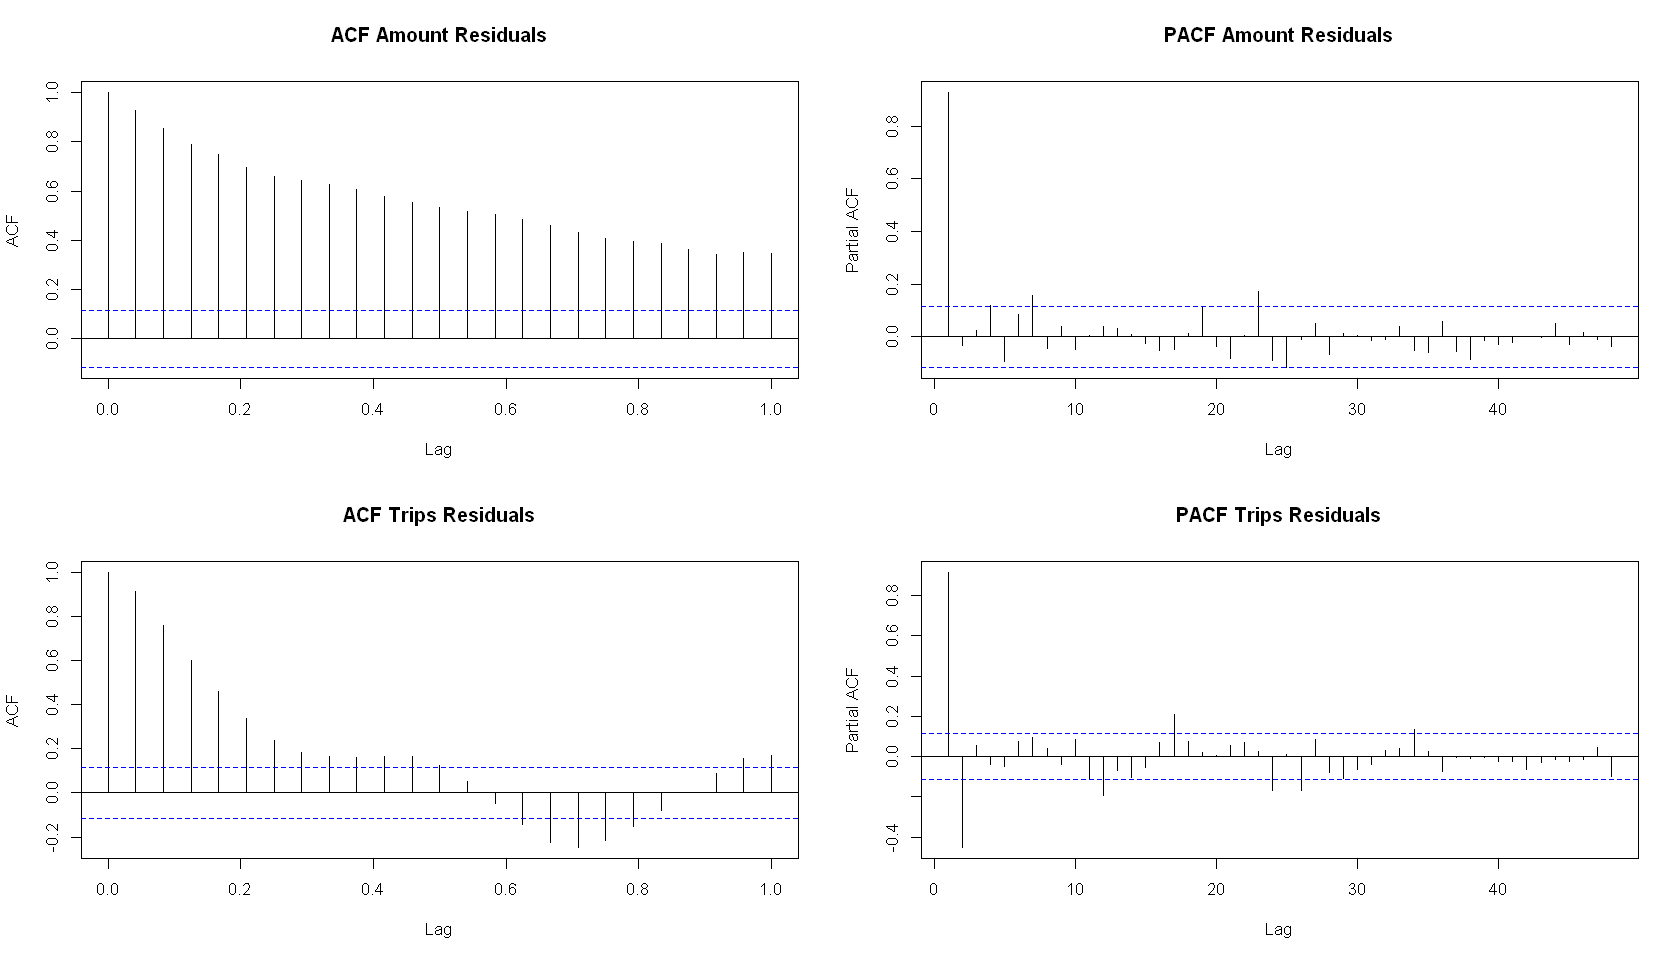

In [18]:
options(repr.plot.width=14, repr.plot.height=8)
par(mfrow = c(2, 2))
plot(acf(lm_fit_amount_residuals, plot=FALSE), main='ACF Amount Residuals')
plot(Pacf(lm_fit_amount_residuals, plot=FALSE), main='PACF Amount Residuals')
plot(acf(lm_fit_trips_residuals, plot=FALSE), main='ACF Trips Residuals')
plot(Pacf(lm_fit_trips_residuals, plot=FALSE), main='PACF Trips Residuals')

### ARIMA Analysis

In [52]:
arima_fit_log_amount <- auto.arima(ts_hourly_amount_per_year, lambda=0, stepwise=FALSE, approximation=FALSE)
arima_fit_log_amount

Series: ts_hourly_amount_per_year 
ARIMA(1,0,3)(0,1,1)[24] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ma1      ma2      ma3     sma1  drift
      0.9546  0.0042  -0.0136  -0.2243  -0.6417  9e-04
s.e.  0.0241  0.0669   0.0686   0.0770   0.0756  4e-04

sigma^2 = 0.0004655:  log likelihood = 634.28
AIC=-1254.56   AICc=-1254.12   BIC=-1229.53

In [53]:
arima_fit_log_trips <- auto.arima(ts_hourly_trips_per_year, lambda=0, stepwise=FALSE, approximation=FALSE)
arima_fit_log_trips

Series: ts_hourly_trips_per_year 
ARIMA(1,0,1)(2,1,0)[24] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ma1     sar1     sar2    drift
      0.9446  0.1094  -0.4690  -0.5498  -0.0080
s.e.  0.0208  0.0647   0.0646   0.0731   0.0022

sigma^2 = 0.007322:  log likelihood = 266.18
AIC=-520.36   AICc=-520.03   BIC=-498.9

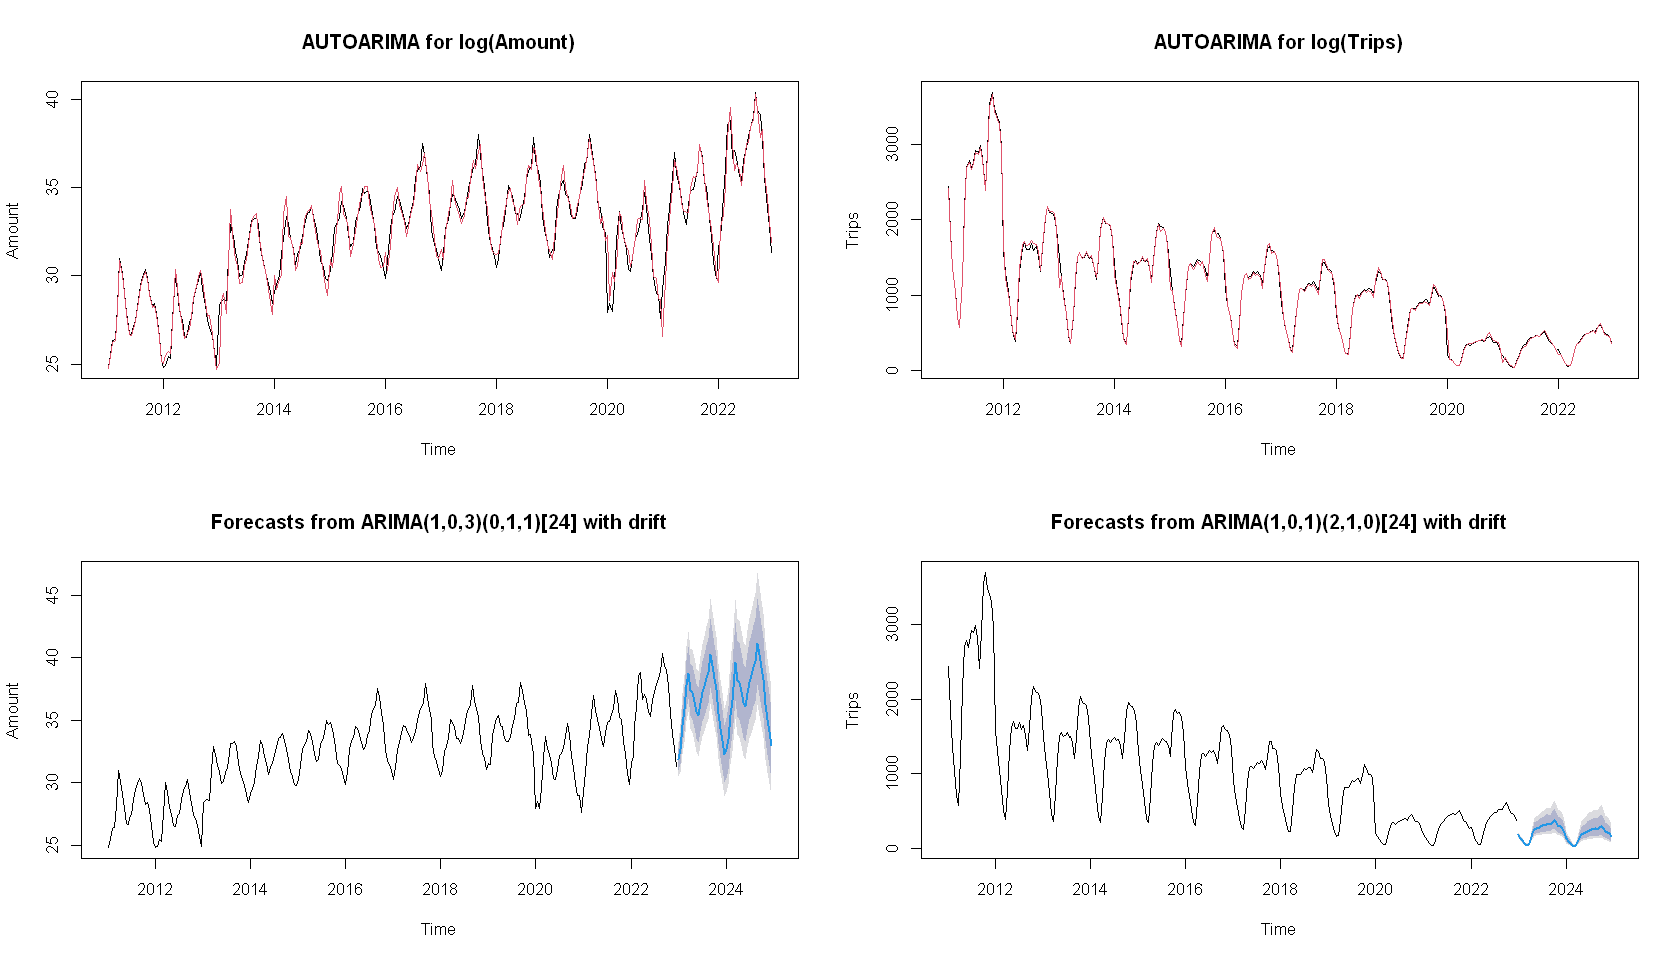

In [56]:
options(repr.plot.width=14, repr.plot.height=8)
par(mfrow = c(2, 2))
plot(ts_hourly_amount_per_year, ylab='Amount', main='AUTOARIMA for log(Amount)')
lines(fitted(arima_fit_log_amount), col=2)
plot(ts_hourly_trips_per_year, ylab='Trips', main='AUTOARIMA for log(Trips)')
lines(fitted(arima_fit_log_trips), col=2)
plot(forecast(arima_fit_log_amount), xlab='Time', ylab='Amount',)
plot(forecast(arima_fit_log_trips), xlab='Time', ylab='Trips',)


	Ljung-Box test

data:  Residuals from ARIMA(1,0,3)(0,1,1)[24] with drift
Q* = 48.538, df = 43, p-value = 0.2596

Model df: 5.   Total lags used: 48



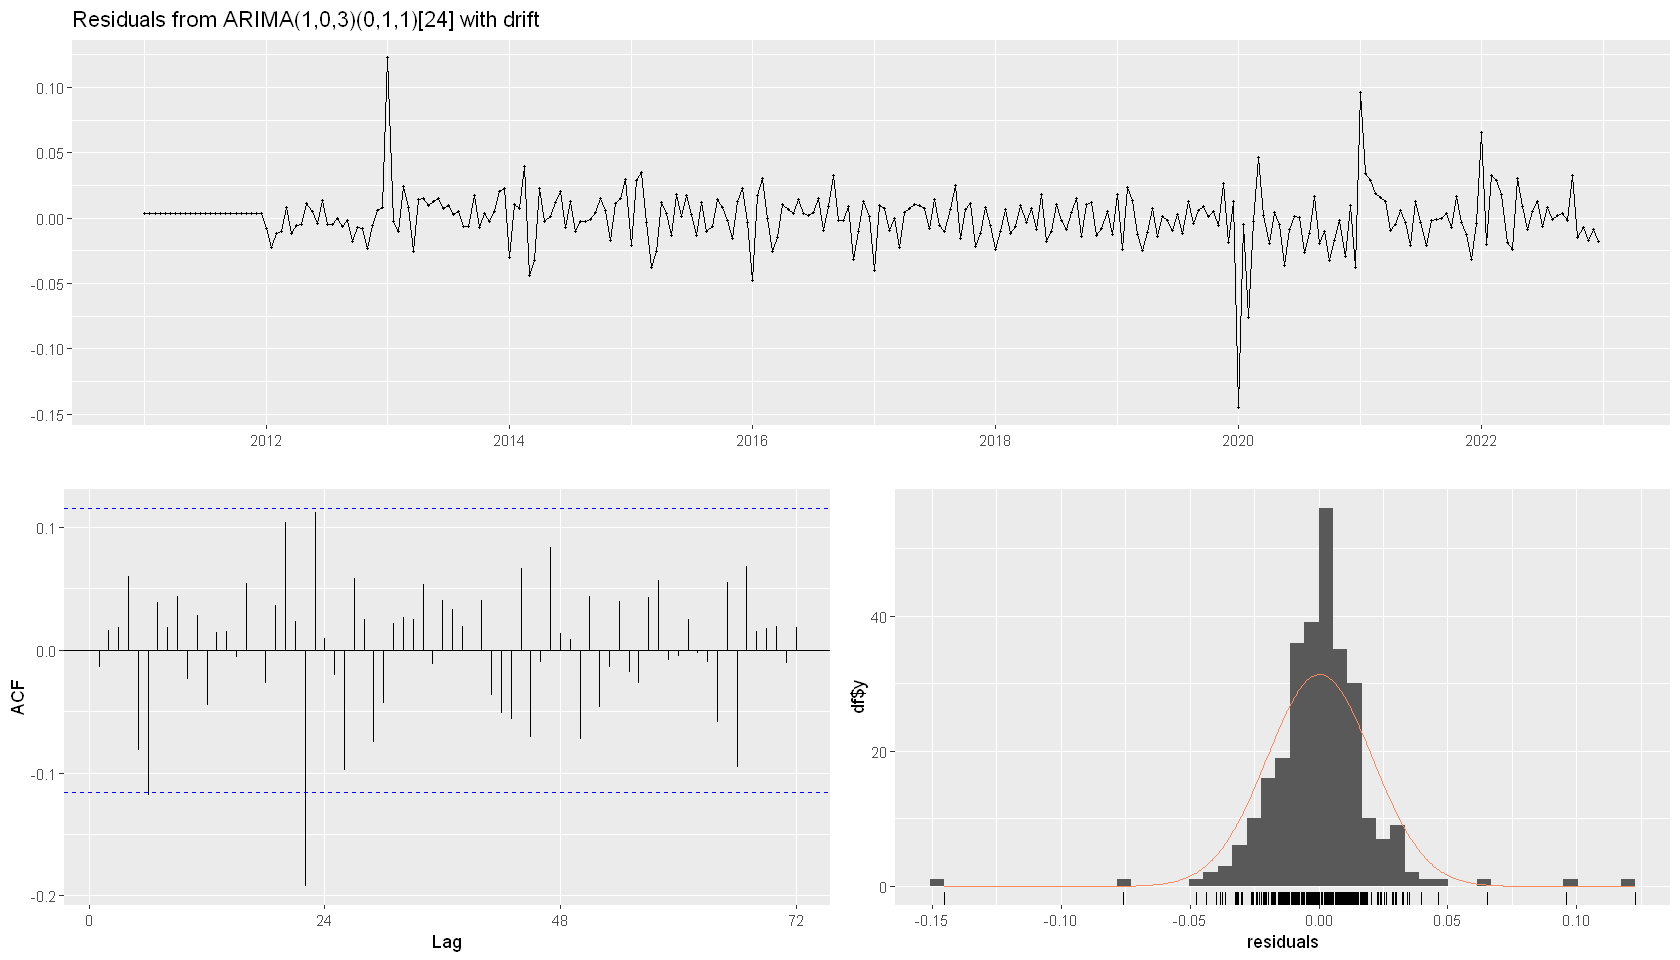

In [57]:
checkresiduals(arima_fit_log_amount)


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(2,1,0)[24] with drift
Q* = 38.793, df = 44, p-value = 0.6938

Model df: 4.   Total lags used: 48



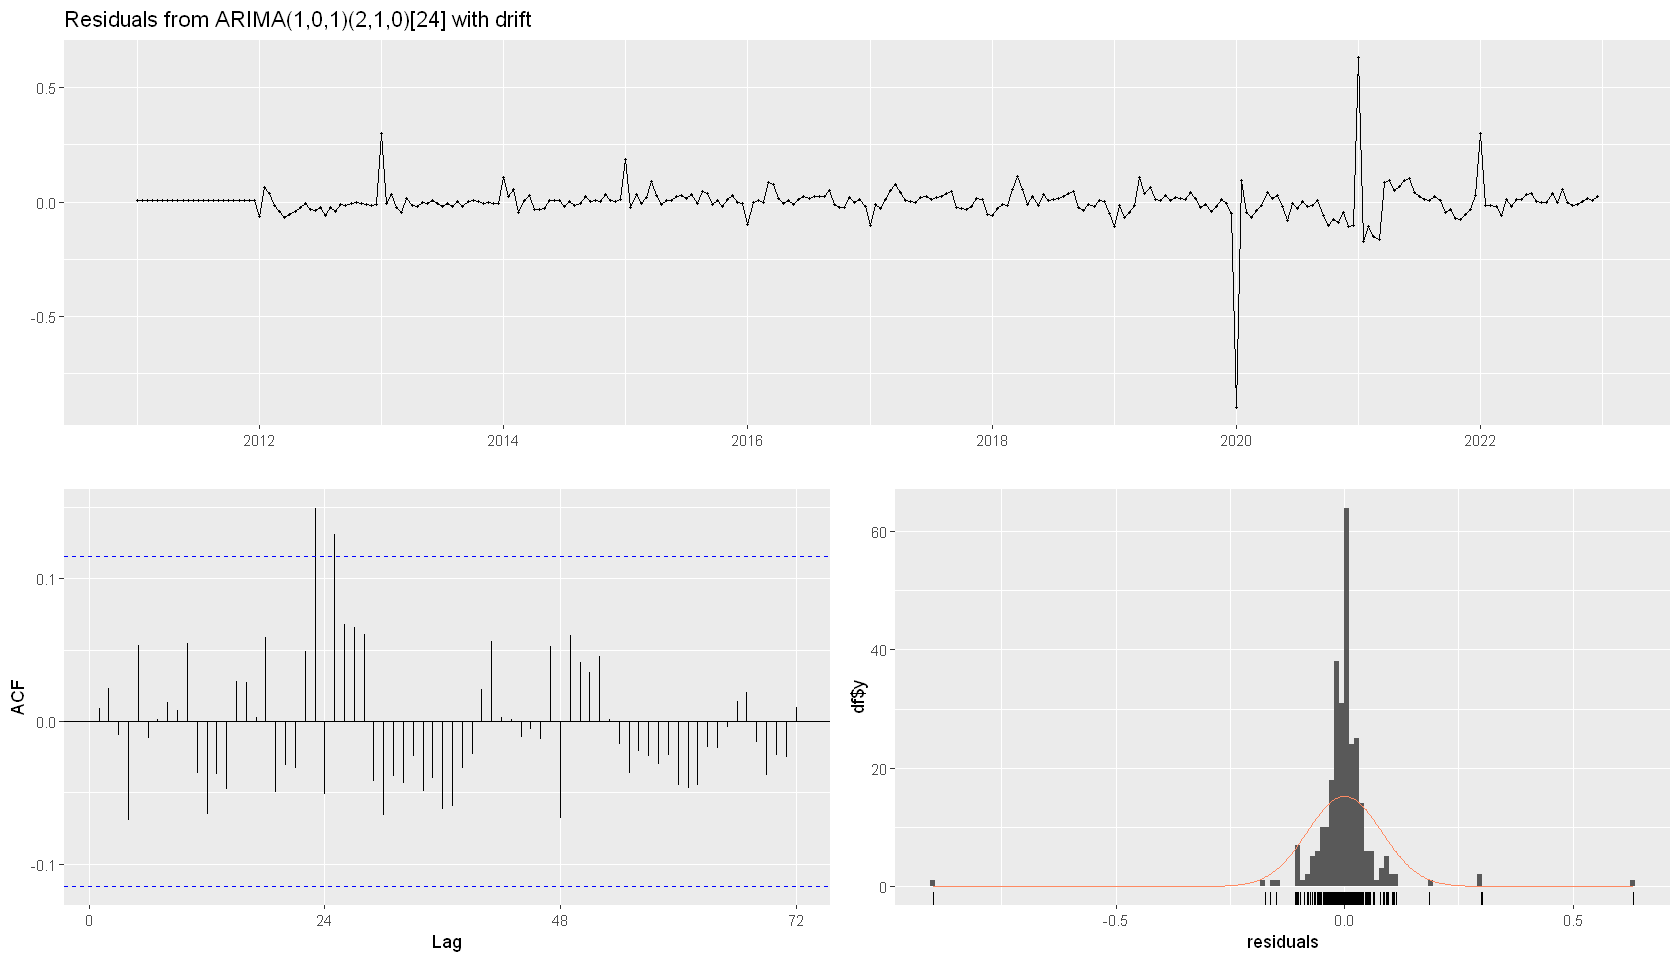

In [58]:
checkresiduals(arima_fit_log_trips)